# Binomial Trees

## Packages

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bespoke module
from option_param import Parameters
from binomial_plot import GraphTree
from crr import BinomialTree

## Parameter

In [2]:
param = Parameters(100,100,0,1,0.05,0.0,0.2)
param.get_attribute()

stock     : 100.0
strike    : 100.0
t         : 0.0
T         : 1.0
tau       : 1.0
rate      : 0.05
dividend  : 0.0
vol       : 0.2


## CRR: Cox, Ross, and Rubinstein (1979): 

### Check algorithm: (works!)
- European put: https://www.youtube.com/watch?v=gOStLKAehjA
- American put: https://www.youtube.com/watch?v=nr8Rw8RYSdU

In [3]:
test = Parameters(102, 100, 0, 0.5, 0.02, 0.0, 0.2000773189775976)
t = BinomialTree(test, 4)
t.set_crr()
t.u = 1.0733 # set u and d manually
t.d = 0.9317
t.set_european()
t.set_american()

#### Stock Price

,0,1,2,3,4
0,102.0,109.4766,117.501235,126.114075,135.358237
1,0.0,95.0334,101.999348,109.475900,117.500484
2,0.0,0.0000,88.542619,95.032793,101.998696
3,0.0,0.0000,0.000000,82.495158,88.542053
4,0.0,0.0000,0.000000,0.000000,76.860739


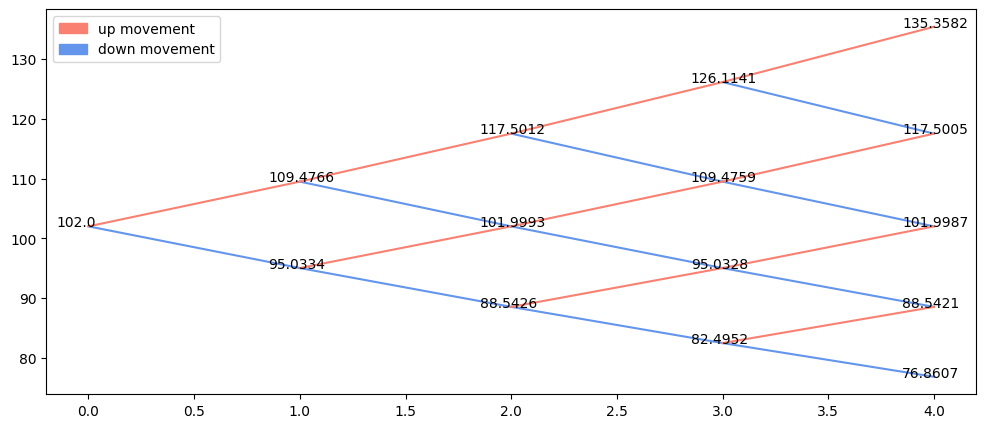

In [4]:
GraphTree(t.t_stock, fig_size = (12,5)).real_tree()
pd.DataFrame(t.t_stock)

,0,1,2,3,4
0,102.0,109.4766,117.501235,126.114075,135.358237
1,0.0,95.0334,101.999348,109.475900,117.500484
2,0.0,0.0000,88.542619,95.032793,101.998696
3,0.0,0.0000,0.000000,82.495158,88.542053
4,0.0,0.0000,0.000000,0.000000,76.860739


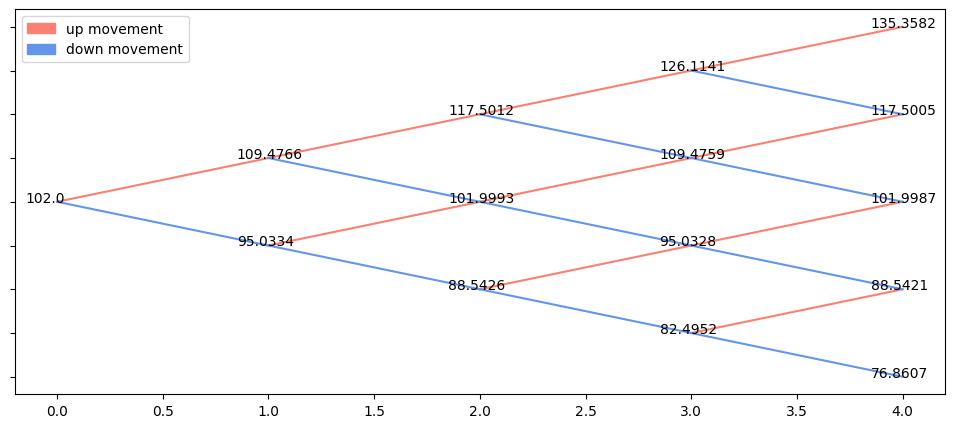

In [5]:
GraphTree(t.t_stock, fig_size = (12,5)).fake_tree()
pd.DataFrame(t.t_stock)

#### European Call

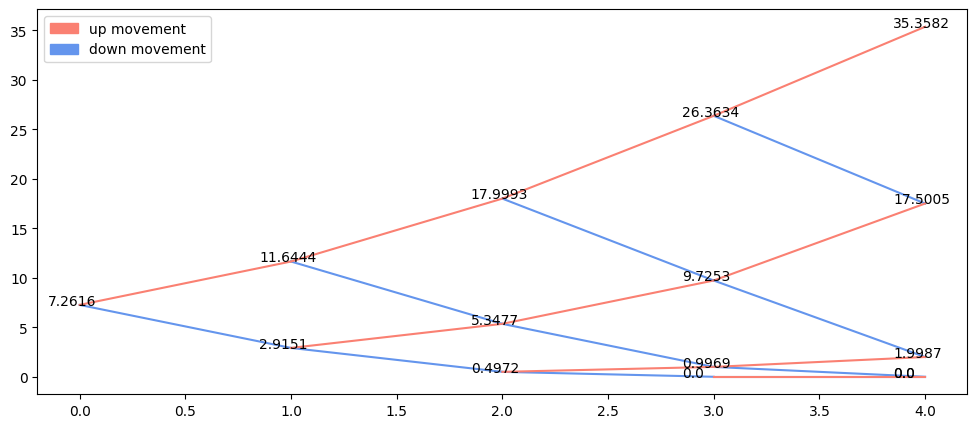

In [6]:
GraphTree(t.t_eu_c, fig_size = (12,5)).real_tree()


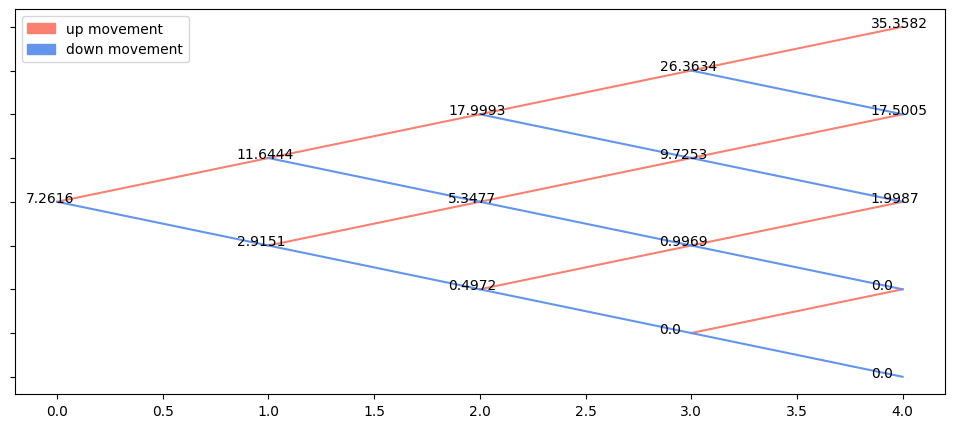

In [7]:
# Using Aesthetic tree 
GraphTree(t.t_eu_c,fig_size = (12,5)).fake_tree()

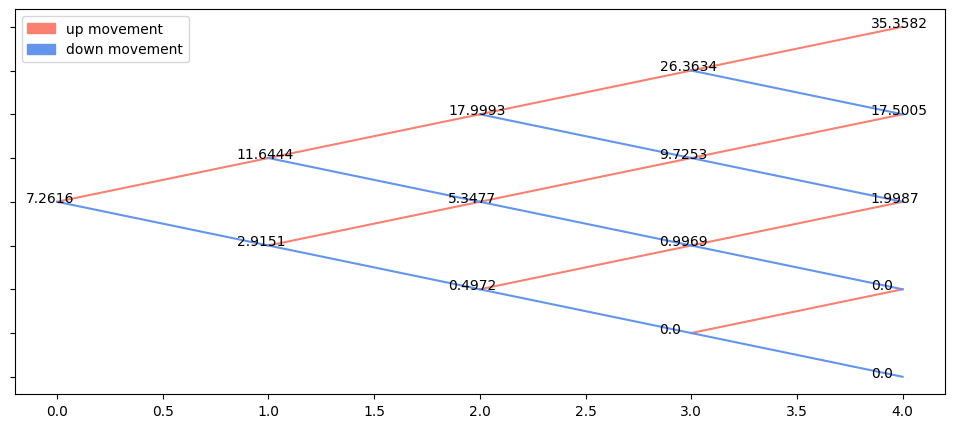

In [8]:
# Using Aesthetic tree 
GraphTree(t.t_eu_c,fig_size = (12,5)).fake_tree()

#### European Put

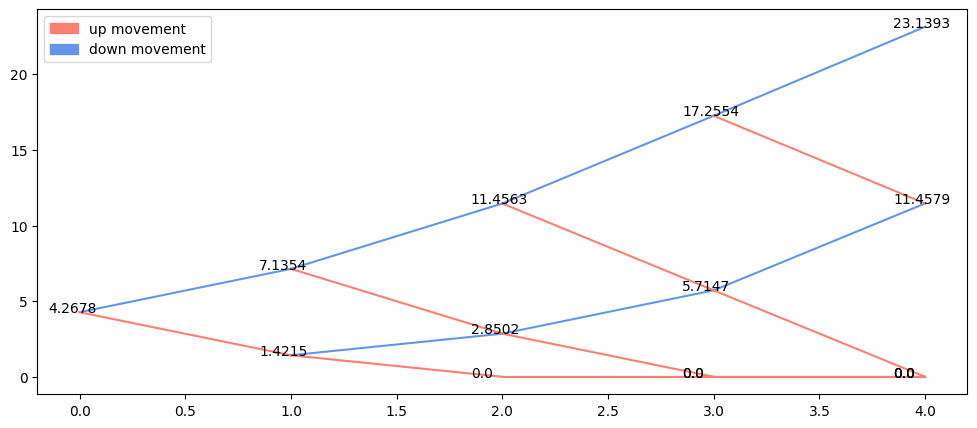

In [9]:
GraphTree(t.t_eu_p, fig_size = (12,5)).real_tree()

Note that the "Up" movement is below the down movement. This is because the option is a Put

In this case, the Fake tree is more intuitif!

array([[ 4.26777422,  1.42153265,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  7.13539353,  2.85018792,  0.        ,  0.        ],
       [ 0.        ,  0.        , 11.45633906,  5.71465679,  0.        ],
       [ 0.        ,  0.        ,  0.        , 17.25539928, 11.45794701],
       [ 0.        ,  0.        ,  0.        ,  0.        , 23.13926137]])

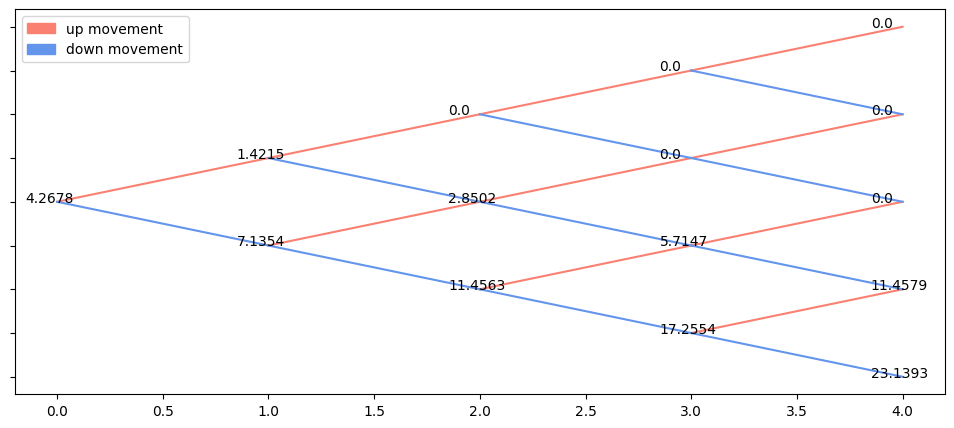

In [10]:
GraphTree(t.t_eu_p, fig_size = (12,5)).fake_tree()
t.t_eu_p

#### American call

array([[ 7.26157935, 11.64435194, 17.99928905, 26.36338857, 35.35823701],
       [ 0.        ,  2.91514148,  5.34768248,  9.72526313, 17.50048395],
       [ 0.        ,  0.        ,  0.49718409,  0.9968551 ,  1.99869644],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

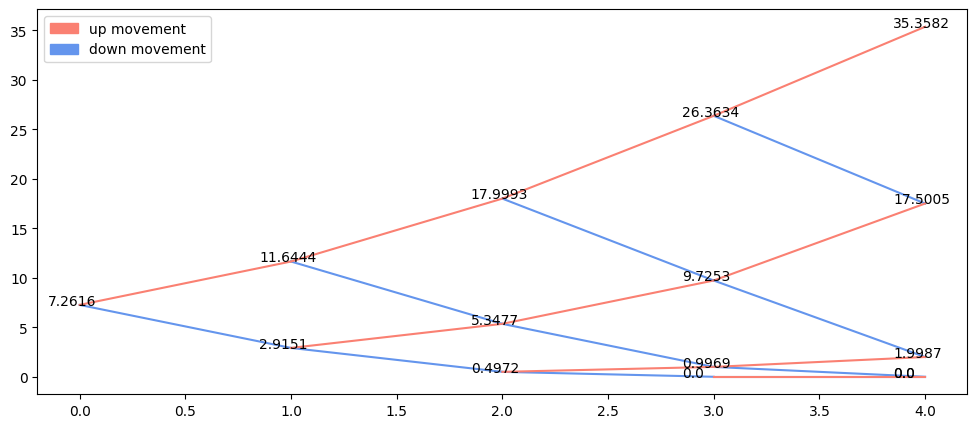

In [11]:
GraphTree(t.t_am_c, fig_size = (12,5)).real_tree()
t.t_am_c

#### American Put

array([[ 4.29872139,  1.42153265,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  7.19744294,  2.85018792,  0.        ,  0.        ],
       [ 0.        ,  0.        , 11.58074878,  5.71465679,  0.        ],
       [ 0.        ,  0.        ,  0.        , 17.50484208, 11.45794701],
       [ 0.        ,  0.        ,  0.        ,  0.        , 23.13926137]])

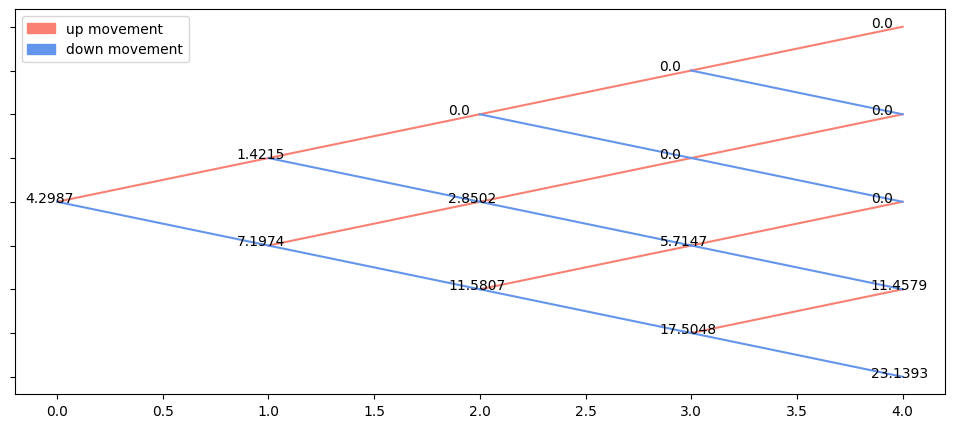

In [12]:
GraphTree(t.t_am_p, fig_size = (12,5)).fake_tree()
t.t_am_p

In [13]:
# Example from John C. Hull 
# Options, Futures, and Other Derivatives 9th Edition
# p475 - 476 || Example 21.1 - Fig. 21.3
test = Parameters(50, 50, 0, 5/12, 0.1, 0.0, 0.4)
t = BinomialTree(test, 5)
t.set_american()

,0,1,2,3,4,5
0,4.488459,2.162519,0.635984,0.000000,0.000000,0.000000
1,0.000000,6.959743,3.771142,1.301666,0.000000,0.000000
2,0.000000,0.000000,10.361294,6.378043,2.664116,0.000000
3,0.000000,0.000000,0.000000,14.638882,10.310650,5.452637
4,0.000000,0.000000,0.000000,0.000000,18.495109,14.638882
5,0.000000,0.000000,0.000000,0.000000,0.000000,21.930804


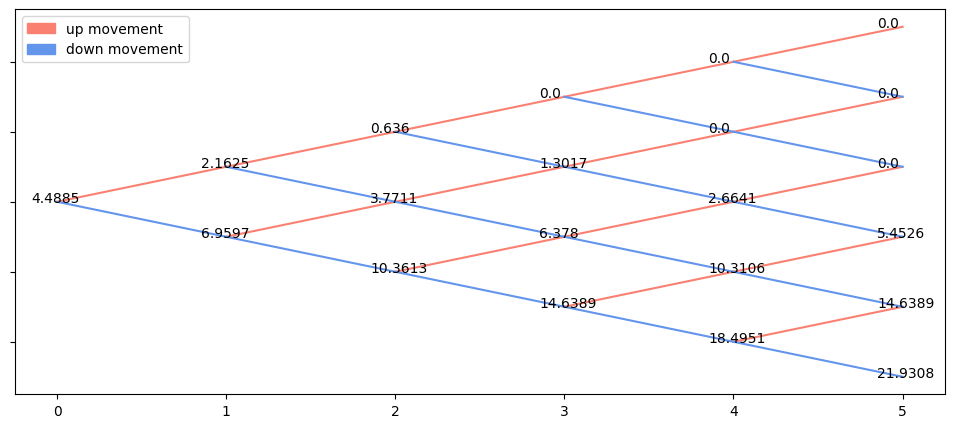

In [14]:
GraphTree(t.t_am_p, fig_size= (12,5)).fake_tree()
pd.DataFrame(t.t_am_p)

,0,1,2,3,4,5,6,7,8
0,50.0,54.779175,60.015160,65.751618,72.036388,78.921877,86.465506,94.730181,103.784823
1,0.0,45.637781,50.000000,54.779175,60.015160,65.751618,72.036388,78.921877,86.465506
2,0.0,0.000000,41.656142,45.637781,50.000000,54.779175,60.015160,65.751618,72.036388
3,0.0,0.000000,0.000000,38.021878,41.656142,45.637781,50.000000,54.779175,60.015160
4,0.0,0.000000,0.000000,0.000000,34.704683,38.021878,41.656142,45.637781,50.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,31.676895,34.704683,38.021878,41.656142
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,28.913264,31.676895,34.704683
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.390744,28.913264
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.088300


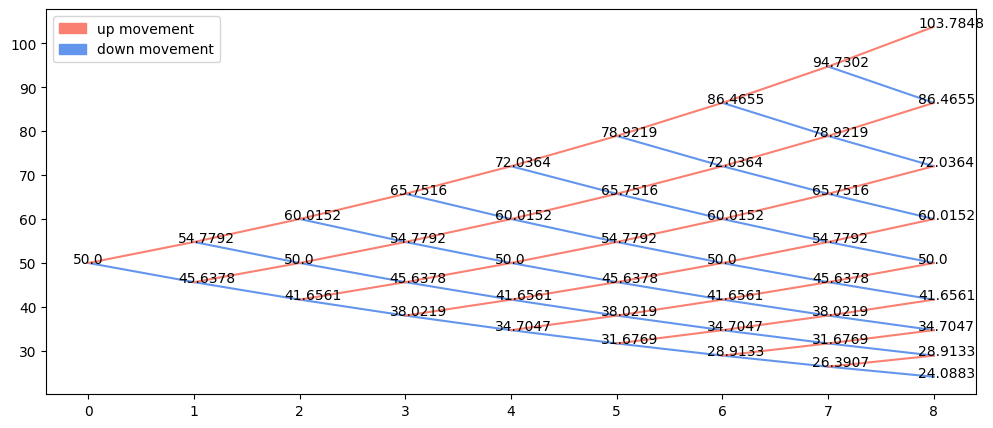

In [15]:
# Example from John C. Hull 
# Options, Futures, and Other Derivatives 9th Edition
# p475 - 476 || Example 21.1 - Fig. 21.3
test = Parameters(50, 50, 0, 5/12, 0.1, 0.0, 0.4)
t = BinomialTree(test, 8)
t.set_american()
GraphTree(t.t_stock, fig_size= (12,5)).real_tree()
pd.DataFrame(t.t_stock)

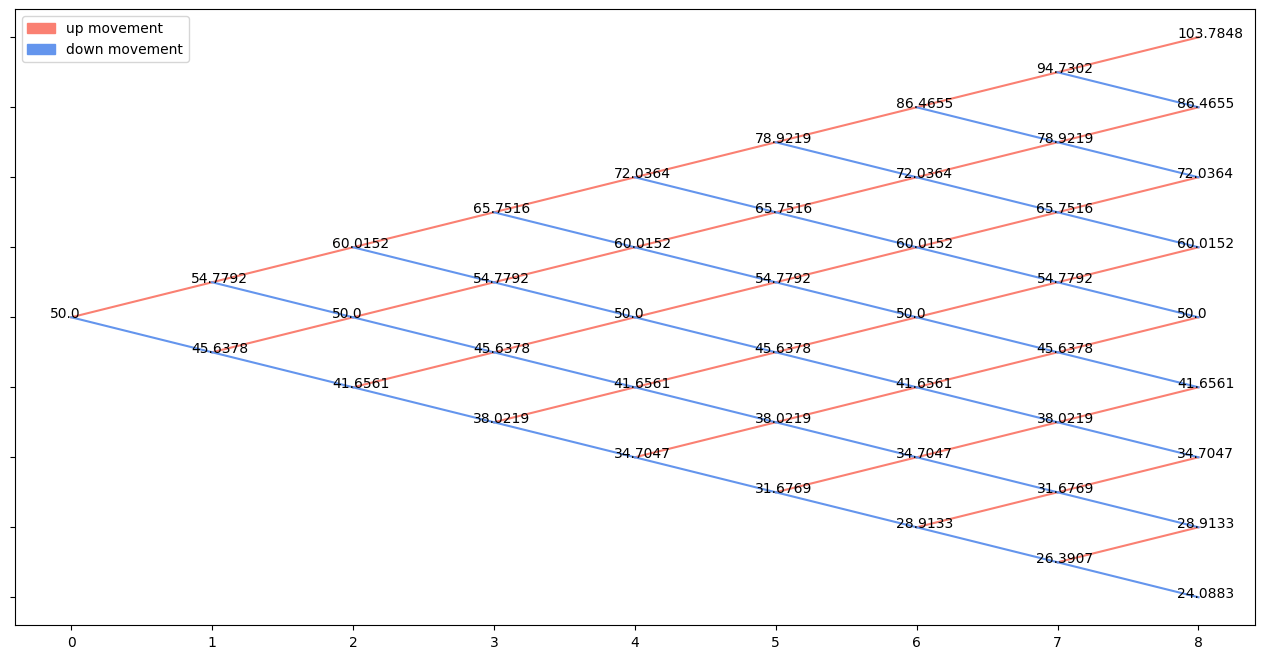

In [16]:
GraphTree(t.t_stock).fake_tree()
